In [49]:
library(qvalue)
library(ggplot2)
library(dplyr)

In [50]:
endo_eqtl_file = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/eqtl_allstages.tsv"
df0 = read.csv(endo_eqtl_file, sep = "\t")
# nrow(df0)
length(unique(df0$feature))
head(df0,2)

[1] 3240

snp_id,feature,stage
5_149826526_C_T,ENSG00000164587_RPS14,ips
11_57283988_C_T,ENSG00000134809_TIMM10,ips


In [51]:
df0$chrom = gsub("_.*","",df0$snp_id)
df0$ensembl_gene_id = gsub("_.*","",df0$feature)
head(df0,2)

snp_id,feature,stage,chrom,ensembl_gene_id
5_149826526_C_T,ENSG00000164587_RPS14,ips,5,ENSG00000164587
11_57283988_C_T,ENSG00000134809_TIMM10,ips,11,ENSG00000134809


In [52]:
mydir = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_endodiff/data/tables_for_anna_Aug2019/ase_interaction_results/"
dynamic_eqtl_file = paste0(mydir,"pseudotimeandmodules.pseudotime_2dof_test.all_leads.multitest_corrected.tsv")
df1 = read.csv(dynamic_eqtl_file, sep = "\t")
nrow(df1)
nrow(df1[df1$qval < 0.1,])
length(unique(df1[df1$qval < 0.1,"ensembl_gene_id"]))
head(df1,2)

[1] 3972

[1] 872

[1] 641

ensembl_gene_id,snp_id,pval,n_cells,factor,qval
ENSG00000142089,11_320394_C_T,6.053215e-275,21955,pseudotime,2.404337e-271
ENSG00000120675,13_43597706_C_T,1.582229e-266,13767,pseudotime,3.142307e-263


In [53]:
df2 = inner_join(df0,df1, by = c("ensembl_gene_id","snp_id"))
head(df2,2)
nrow(df2)

Warning message:
“Column `ensembl_gene_id` joining character vector and factor, coercing into character vector”Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”

snp_id,feature,stage,chrom,ensembl_gene_id,pval,n_cells,factor,qval
5_149826526_C_T,ENSG00000164587_RPS14,ips,5,ENSG00000164587,1.758952e-08,13025,pseudotime,4.688964e-07
12_56401085_G_A,ENSG00000197728_RPS26,ips,12,ENSG00000197728,1.190617e-38,16959,pseudotime,3.637793e-36


[1] 4302

In [54]:
finished_chromosomes = c(3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,20,21,22)
# finished_chromosomes = c(8,10,13,15,18,22)
# finished_chromosomes = 22
df2 = df2[df2$chrom %in% finished_chromosomes,]
df2$eqtl = paste0(df2$feature,"-",df2$snp_id)
T = 0.05
dynamic_eqtls = unique(df2[df2$qval<T,"eqtl"])
length(dynamic_eqtls)

[1] 502

In [55]:
folder = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/new/MOFA/"

In [56]:
##### MOFA 1

In [57]:
T = 0.05
summary_filename = paste0(folder, "MOFA1/summary_endo_eqtl.csv")
df = read.csv(summary_filename, row.names = 1)
df = df[df$chrom %in% finished_chromosomes,]
df$eqtl = paste0(df$gene,"-",df$snpID)
df$qv = qvalue(df$pv, pi0 = 1)$qvalue
mofa1_dyn = nrow(df[df$qv<T & df$eqtl %in% dynamic_eqtls,])
mofa1 = nrow(df[df$qv<T,])
n_genes1 = nrow(df)
# mofa1 = length(unique(df[df$qv<0.05,"gene"]))
# n_genes1 = length(unique(df$gene))
c(mofa1_dyn, mofa1, n_genes1)

[1]   60  134 3107

In [58]:
length(dynamic_eqtls)
length(dynamic_eqtls[dynamic_eqtls %in% df[df$qv<T,]$eqtl])

[1] 502

[1] 60

In [59]:
##### MOFA 2

In [60]:
summary_filename = paste0(folder, "MOFA2/summary_endo_eqtl.csv")
df = read.csv(summary_filename, row.names = 1)
df = df[df$chrom %in% finished_chromosomes,]
df$eqtl = paste0(df$gene,"-",df$snpID)
df$qv = qvalue(df$pv, pi0 = 1)$qvalue
mofa2_dyn = nrow(df[df$qv<T & df$eqtl %in% dynamic_eqtls,])
mofa2 = nrow(df[df$qv<T,])
n_genes2 = nrow(df)
# mofa2 = length(unique(df[df$qv<0.05,"gene"]))
# n_genes2 = length(unique(df$gene))
c(mofa2_dyn, mofa2, n_genes2)

[1]   63  146 3107

In [61]:
length(dynamic_eqtls)
length(dynamic_eqtls[dynamic_eqtls %in% df[df$qv<T,]$eqtl])

[1] 502

[1] 63

In [62]:
##### MOFA 5

In [63]:
summary_filename = paste0(folder, "MOFA5/summary_endo_eqtl.csv")
df = read.csv(summary_filename, row.names = 1)
df = df[df$chrom %in% finished_chromosomes,]
df$eqtl = paste0(df$gene,"-",df$snpID)
df$qv = qvalue(df$pv, pi0 = 1)$qvalue
mofa5_dyn = nrow(df[df$qv<T & df$eqtl %in% dynamic_eqtls,])
mofa5 = nrow(df[df$qv<T,])
n_genes5 = nrow(df)
# mofa5 = length(unique(df[df$qv<0.05,"gene"]))
# n_genes5 = length(unique(df$gene))
c(mofa5_dyn, mofa5, n_genes5)

[1]   71  195 3107

In [64]:
length(dynamic_eqtls)
length(dynamic_eqtls[dynamic_eqtls %in% df[df$qv<T,]$eqtl])

[1] 502

[1] 71

In [65]:
##### MOFA 10

In [66]:
summary_filename = paste0(folder, "MOFA10/summary_endo_eqtl.csv")
df = read.csv(summary_filename, row.names = 1)
df = df[df$chrom %in% finished_chromosomes,]
df$eqtl = paste0(df$gene,"-",df$snpID)
df$qv = qvalue(df$pv, pi0 = 1)$qvalue
mofa10_dyn = nrow(df[df$qv<T & df$eqtl %in% dynamic_eqtls,])
mofa10 = nrow(df[df$qv<T,])
n_genes10 = nrow(df)
# mofa10 = length(unique(df[df$qv<0.05,"gene"]))
# n_genes10 = length(unique(df$gene))
c(mofa10_dyn, mofa10, n_genes10)

[1]  128  345 3107

In [67]:
length(dynamic_eqtls)
length(dynamic_eqtls[dynamic_eqtls %in% df[df$qv<T,]$eqtl])

[1] 502

[1] 128

In [68]:
df_to_plot = data.frame(n_MOFA = c(1,2,5,10), 
                        n_dynamic_eGenes = c(mofa1_dyn, mofa2_dyn, mofa5_dyn, mofa10_dyn), 
                        n_eGenes = c(mofa1, mofa2, mofa5, mofa10), 
                        n_genes = c(n_genes1, n_genes2, n_genes5, n_genes10))

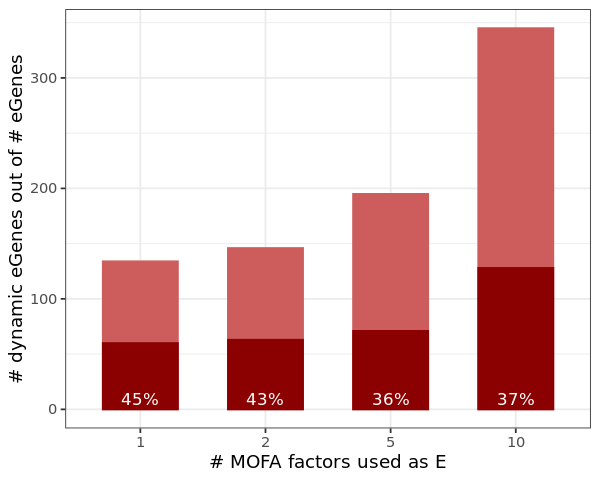

In [69]:
options(repr.plot.width = 5, repr.plot.height = 4)
ggplot(df_to_plot, aes(x = as.factor(n_MOFA), y = n_eGenes)) + #ggtitle("chromosome 21") + 
    geom_bar(stat="identity", width = 0.6, fill = "indianred", col = "indianred") + 
    geom_bar(aes(x = as.factor(n_MOFA), y = n_dynamic_eGenes), stat="identity", width = 0.6, 
             fill = "darkred", col = "darkred") +
    xlab("# MOFA factors used as E") + ylab("# dynamic eGenes out of # eGenes") + theme_bw() +
    annotate("text", x=1, y=9, label= paste0(round(mofa1_dyn/mofa1,digits=2)*100,"%"), size = 3.5, col = "white") +
    annotate("text", x=2, y=9, label= paste0(round(mofa2_dyn/mofa2,digits=2)*100,"%"), size = 3.5, col = "white") +
    annotate("text", x=3, y=9, label= paste0(round(mofa5_dyn/mofa5,digits=2)*100,"%"), size = 3.5, col = "white") +
    annotate("text", x=4, y=9, label= paste0(round(mofa10_dyn/mofa10,digits=2)*100,"%"), size = 3.5, col = "white")

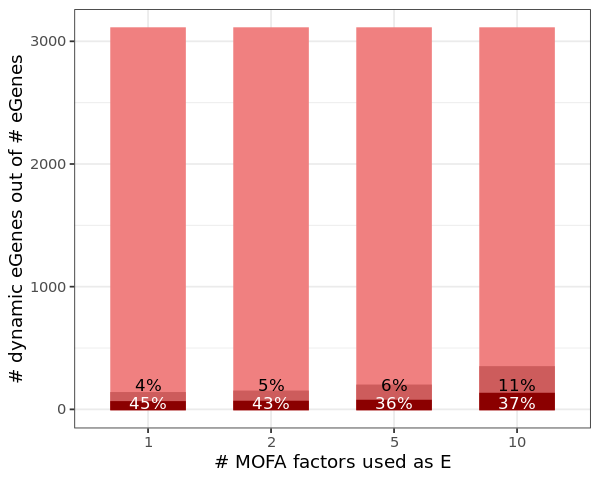

In [70]:
options(repr.plot.width = 5, repr.plot.height = 4)
ggplot(df_to_plot, aes(x = as.factor(n_MOFA), y = n_genes)) + #ggtitle("chromosome 21") + 
    geom_bar(stat="identity", width = 0.6, fill = "lightcoral", col = "lightcoral") + 
    geom_bar(aes(x = as.factor(n_MOFA), y = n_eGenes), stat="identity", width = 0.6, 
             fill = "indianred", col = "indianred") +
    geom_bar(aes(x = as.factor(n_MOFA), y = n_dynamic_eGenes), stat="identity", width = 0.6, 
             fill = "darkred", col = "darkred") +
    xlab("# MOFA factors used as E") + ylab("# dynamic eGenes out of # eGenes") + theme_bw() +
    annotate("text", x=1, y=50, label= paste0(round(mofa1_dyn/mofa1,digits=2)*100,"%"), size = 3.5, col = "white") +
    annotate("text", x=2, y=50, label= paste0(round(mofa2_dyn/mofa2,digits=2)*100,"%"), size = 3.5, col = "white") +
    annotate("text", x=3, y=50, label= paste0(round(mofa5_dyn/mofa5,digits=2)*100,"%"), size = 3.5, col = "white") +
    annotate("text", x=4, y=50, label= paste0(round(mofa10_dyn/mofa10,digits=2)*100,"%"), size = 3.5, col = "white") +
    annotate("text", x=1, y=200, label= paste0(round(mofa1/n_genes1,digits=2)*100,"%"), size = 3.5, col = "black") +
    annotate("text", x=2, y=200, label= paste0(round(mofa2/n_genes2,digits=2)*100,"%"), size = 3.5, col = "black") +
    annotate("text", x=3, y=200, label= paste0(round(mofa5/n_genes5,digits=2)*100,"%"), size = 3.5, col = "black") +
    annotate("text", x=4, y=200, label= paste0(round(mofa10/n_genes10,digits=2)*100,"%"), size = 3.5, col = "black")

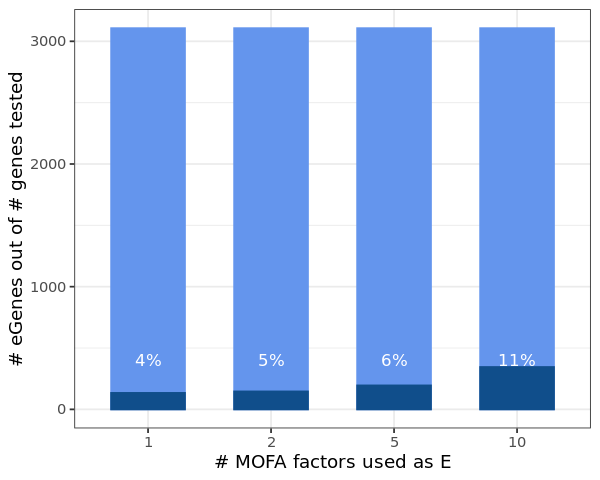

In [71]:
ggplot(df_to_plot, aes(x = as.factor(n_MOFA), y = n_genes)) + #ggtitle("chromosome 21") + 
    geom_bar(stat="identity", width = 0.6, fill = "cornflowerblue", col = "cornflowerblue") + 
    geom_bar(aes(x = as.factor(n_MOFA), y = n_eGenes), stat="identity", width = 0.6, 
             fill = "dodgerblue4", col = "dodgerblue4") + 
    xlab("# MOFA factors used as E") + ylab("# eGenes out of # genes tested") + theme_bw() +
    annotate("text", x=1, y=400, label= paste0(round(mofa1/n_genes1,digits=2)*100,"%"), size = 3.5, col = "white") +
    annotate("text", x=2, y=400, label= paste0(round(mofa2/n_genes2,digits=2)*100,"%"), size = 3.5, col = "white") +
    annotate("text", x=3, y=400, label= paste0(round(mofa5/n_genes5,digits=2)*100,"%"), size = 3.5, col = "white") +
    annotate("text", x=4, y=400, label= paste0(round(mofa10/n_genes10,digits=2)*100,"%"), size = 3.5, col = "white")